In [110]:
from model.gan_model import GanModel
import utils.constants as constants
from utils.log_utils import init_log, dispose_log
from plot.plot_prediction import plot_hist, plot_samples

import pandas as pd
from datetime import timedelta, datetime
from calendar import monthrange
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import torch
from pathlib import Path
import os
import time

In [33]:
device = 'cpu'    
zone = 'SUD'
version = 'v1'

curr_dir = Path.cwd()

In [34]:
def load_model(models_folder, parameters, model_name, device):
    model = GanModel.load_params(curr_dir / '..' / 'parameters', parameters)
    model.load_model(models_folder, model_name, device)
    return model

In [35]:
models_folder = curr_dir / '..' / 'trained_models'

parameters = f'{zone}_{version}'
model_name = f'{zone}_{version}'

model = load_model(models_folder, parameters, model_name, device)

model.load_training_data(curr_dir / '..' / 'data')

Historical data are from: 2015-01-01 00:00:00 - to: 2021-12-31 00:00:00


In [115]:
month_dict = {
    'JAN': '01',
    'FEB': '02',
    'MAR': '03',
    'APR': '04',
    'MAY': '05',
    'JUN': '06',
    'JUL': '07',
    'AUG': '08',
    'SEP': '09',
    'OCT': '10',
    'NOV': '11',
    'DEC': '12',
}

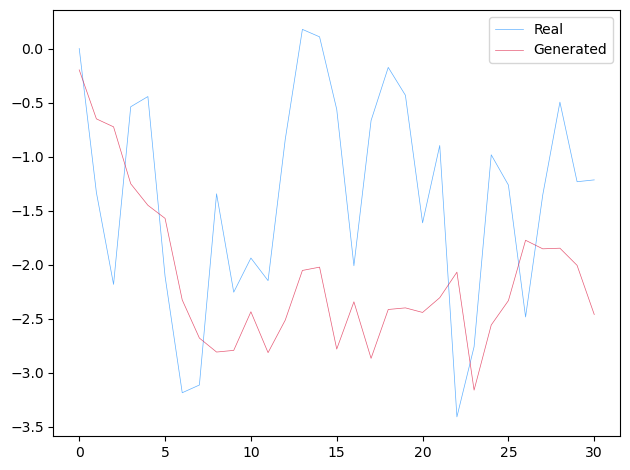

In [1123]:
month = 'JUL'
month_n = month_dict[month]

_, model.custom_params['t_size'] = monthrange(2021, int(month_n))
model.custom_params['num_plot_samples'] = 2

start_test = f'2021-{month_n}-01'
end_test = f'2021-{month_n}-{model.custom_params["t_size"]}'

generated_samples, real_samples = model.predict2(start_test, end_test, device, plot=False)

ts = model.ts
real_sample_ = real_samples[0]
generated_sample_ = torch.mean(generated_samples, dim=0, keepdim=False)

plt.figure()
plt.plot(ts, real_sample_, color='dodgerblue', linewidth=0.5, alpha=0.7, label='Real')
plt.plot(ts, generated_sample_, color='crimson', linewidth=0.5, alpha=0.7, label='Generated')
plt.legend()
# plt.title(f"{num_plot_samples} samples from both real and generated distributions ({zone}).")
plt.tight_layout()
#plt.savefig(f'images/samples_real_vs_generated_{zone}.png', dpi=200, format='png')
plt.show() 


In [1124]:
df_pred =pd.DataFrame(
    {
        'date': pd.date_range(start_test, end_test, freq='D'),
        'real': pd.Series(real_sample_.numpy()),
        'generated': pd.Series(generated_sample_.numpy())
    }
)
df_pred.set_index('date', inplace=True, drop=True)
df_pred

,real,generated
date,,
2021-07-01,0.000000,-0.198042
2021-07-02,-1.332566,-0.651319
2021-07-03,-2.183836,-0.725181
2021-07-04,-0.539206,-1.251846
2021-07-05,-0.444643,-1.451183
2021-07-06,-2.108638,-1.572323
2021-07-07,-3.186460,-2.327461
2021-07-08,-3.115029,-2.680465
2021-07-09,-1.344683,-2.809871


In [1125]:
df_pred.to_csv(f'./forecast_{month}_2021.csv')

In [1126]:
df_pred = pd.read_csv(f'forecast_{month}_2021.csv')
df_pred = pd.DataFrame(df_pred)
df_pred.set_index('date', inplace=True, drop=True)
df_pred

,real,generated
date,,
2021-07-01,0.000000,-0.198042
2021-07-02,-1.332566,-0.651319
2021-07-03,-2.183836,-0.725181
2021-07-04,-0.539206,-1.251846
2021-07-05,-0.444643,-1.451183
2021-07-06,-2.108638,-1.572323
2021-07-07,-3.186460,-2.327461
2021-07-08,-3.115029,-2.680465
2021-07-09,-1.344683,-2.809871


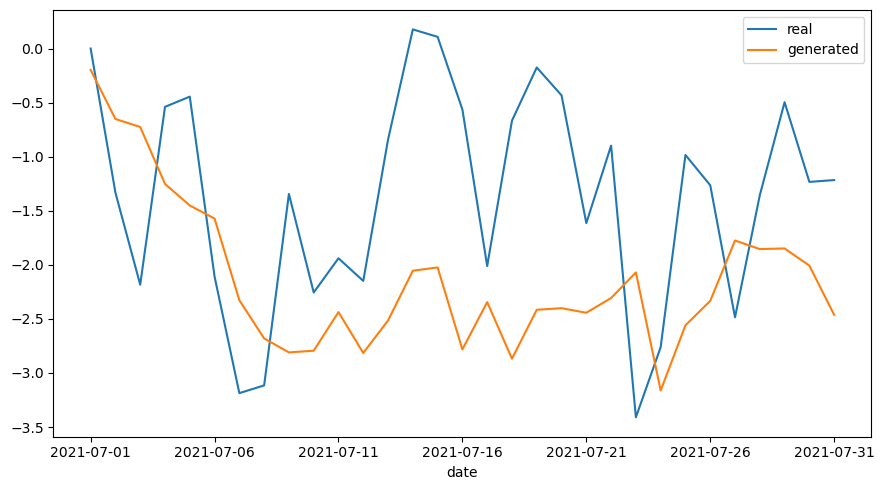

In [1127]:
ax = df_pred.plot(figsize=(9,5))
# ax.set_xticks(df_pred.index)
plt.legend()
plt.tight_layout()
plt.savefig(f'../images/forecast_{month}_2021.png', dpi=200, format='png')